In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pretraitement des donnees

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
(200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
5

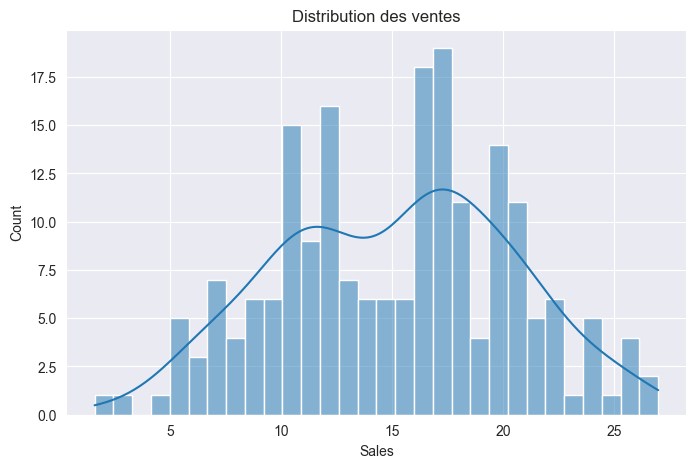

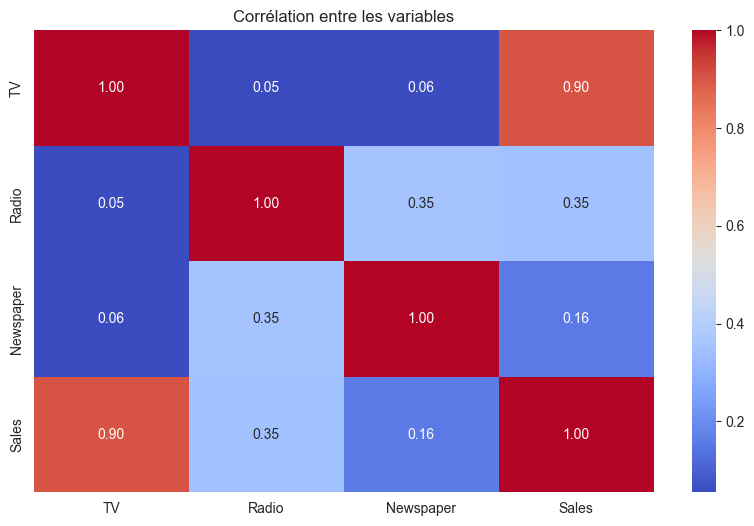

In [3]:
# Charger le dataset
df = pd.read_csv("D:\\python\\CodSoft\\sales\\advertising.csv")

# Afficher les premieres lignes
print(df.head())

#
print(df.shape)

# Infos générales
print(df.info())

# Vérifier les valeurs manquantes
print(df.isnull().sum())#

# Statistiques de base
print(df.describe())


#Histogramme des ventes
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title("Distribution des ventes")
plt.show()

# Matrice de corrélation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre les variables")
plt.show()


separation

In [5]:
from sklearn.model_selection import train_test_split

#1er etape separer featues et tagets
# Features (X) : TV, Radio, Newspaper
X = df[['TV', 'Radio', 'Newspaper']]

# Target (y) : Sales
y = df['Sales']

#2eme etape division en train et test
# 80% pour l'entraînement, 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les tailles des ensembles
print("Taille de X_train :", X_train.shape)
print("Taille de X_test :", X_test.shape)
print("Taille de y_train :", y_train.shape)
print("Taille de y_test :", y_test.shape)


Taille de X_train : (160, 3)
Taille de X_test : (40, 3)
Taille de y_train : (160,)
Taille de y_test : (40,)


regression lineaire

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialiser le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle avec les données d'entraînement
model.fit(X_train, y_train)


# Prédire sur les données de test
y_pred = model.predict(X_test)

# Calculer les métriques de performance
mae = mean_absolute_error(y_test, y_pred) #mesure l'erreur du model
mse = mean_squared_error(y_test, y_pred) #mesure l'erreur du model
rmse = mse ** 0.5 #mesure l'erreur du model
r2 = r2_score(y_test, y_pred) # le pourcentage du variance plus proche de 1 = meilleur modèle

# plt.scatter(y_test, y_pred)
# plt.plot(y_test, y_pred)
# plt.show()


# Afficher les résultats
print("Linear Regression Results:")
print("Mean Absolute Error (MAE) :", mae)
print("Mean Squared Error (MSE) :", mse)
print("Root Mean Squared Error (RMSE) :", rmse)
print("Coefficient de détermination (R²) :", r2)


Linear Regression Results:
Mean Absolute Error (MAE) : 1.2748262109549338
Mean Squared Error (MSE) : 2.9077569102710896
Root Mean Squared Error (RMSE) : 1.7052146229349223
Coefficient de détermination (R²) : 0.9059011844150826


random forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialisation du modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraînement du modèle
rf_model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred_rf = rf_model.predict(X_test)

# Évaluation du modèle
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

# Affichage des résultats
print("Random Forest Regression Results:")
print("Mean Absolute Error (MAE) :", mae_rf)
print("Mean Squared Error (MSE) :", mse_rf)
print("Root Mean Squared Error (RMSE) :", rmse_rf)
print("Coefficient de détermination (R²) :", r2_rf)


Random Forest Regression Results:
Mean Absolute Error (MAE) : 0.9179999999999993
Mean Squared Error (MSE) : 1.4374328500000009
Root Mean Squared Error (RMSE) : 1.1989298770153327
Coefficient de détermination (R²) : 0.9534827934927883


comparaison


In [8]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
}

# Stocker les résultats
results = {}

# Entraîner et évaluer chaque modèle
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    results[name] = [mae, mse, rmse, r2]

# Convertir les résultats en DataFrame pour une meilleure lisibilité
results_df = pd.DataFrame(results, index=["MAE", "MSE", "RMSE", "R²"]).T
print(results_df)

                        MAE       MSE      RMSE        R²
Linear Regression  1.274826  2.907757  1.705215  0.905901
Random Forest      0.918000  1.437433  1.198930  0.953483
